In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import argparse
from torchvision.utils import save_image

from IPython.display import Image

#local imports
from a3_gan_template import Generator

In [305]:
generator = Generator()
folder_name = "model05"
path = "./" + folder_name + "/"
model_name = "Generator.pt"
device = torch.device('cpu')

try:
    generator.load_state_dict(torch.load(path + model_name, map_location=device))
except:
    print(f"generator not found, random initialization will be used.")
    
generator.eval()

Generator(
  (generator): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2)
    (11): Linear(in_features=1024, out_features=784, bias=True)
    (12): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Tanh()
  )
)

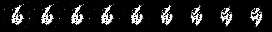

In [341]:
z = torch.randn(9,100)
start = 0
end = 8
r = end-start
for j in range(1):
    for i in range(1,8):
        z[i+j, :] = ((end - i)*z[start,:] + i*z[end+j,:])/r
x = generator(z)


save_image(x.view(-1, 1, 28, 28),
                    'samples.png',
                    nrow=9,
                    normalize=True)

Image(filename='samples.png') 

In [328]:
z[0] == z[8]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)

In [276]:
z[0].norm()

tensor(10.0127)

In [277]:
z[8].norm()

tensor(8.8751)

In [278]:
(((z[8] - 0.01) <= z[0]) & (z[0] <= (z[8] + 0.01))).sum()

tensor(8)

In [279]:
(((x[8] - 0.01) <= x[0]) & (x[0] <= (x[8] + 0.01))).sum()

tensor(628)

In [110]:

s = np.load("stats.npy")
s = s[()]

In [ ]:
stats["loss_G"]

In [32]:
stats = pd.DataFrame(data=None, columns = ["loss_G", "loss_D"])
stats["loss_G"] = s["loss_G"]
stats["loss_D"] = s["loss_D"]

In [215]:
stats.at[100634,"loss_G"]

86.03196716308594

In [214]:
stats.at[100635,"loss_G"]

nan

In [218]:
stats.at[100633,"loss_D"]

87.23841857910156

In [217]:
stats.at[100635,"loss_D"]

nan

In [3]:
elbo = {}
path = "./VAE_VAE_20/"
elbo["dev"] = np.load(path+ "dev_curve.npy")
elbo["train"] = np.load(path+ "train_elbo.npy")

In [5]:
df_elbo = pd.DataFrame.from_dict(elbo)

In [6]:
df_elbo.head()

,dev,train
0,150.719985,184.480969
1,131.880889,138.730101
2,124.599750,128.242935
3,120.939436,121.836762
4,115.375948,118.737698


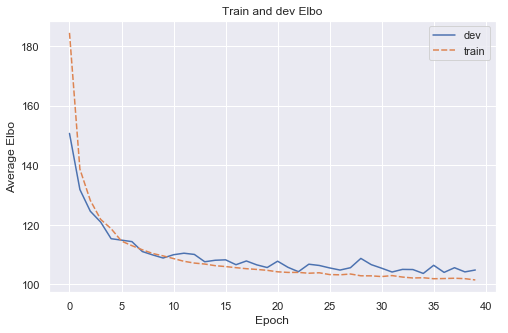

In [7]:
title = "Train and dev Elbo"
ylabel = "Average Elbo"
xlabel = "Epoch"

sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lineplot(data = df_elbo)

ax.set_title(title)
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)

fig = ax.get_figure()
title = title.split()
title = "_".join(title)
fig.savefig(title + ".png")

In [22]:
def manifold_plot_n_save(model):
    with torch.no_grad():
        num_row = 20
        grid = torch.linspace(0, 1, num_row)
        samples = [torch.erfinv(2 * torch.tensor([x, y]) - 1) * np.sqrt(2) for x in grid for y in grid]
        samples = torch.stack(samples).to(model.device)
        manifold = model.decoder(samples).view(-1, 1, 28, 28)
        image = make_grid(manifold, nrow = num_row)
        plt.show()
        plt.imsave("something.png", image.cpu().numpy().transpose(1,2, 0))

In [32]:
import a3_vae_template
from a3_vae_template import VAE, Encoder, Decoder
from torchvision.utils import make_grid

device = torch.device('cpu')

model = VAE(z_dim=25, device = device)
# model.encoder = Encoder(z_dim=2)
# model.decoder = Encoder(z_dim=2)

folder_name = "./VAE_2d/"
model_name = "VAE.pt"

model.load_state_dict(torch.load(path + model_name, map_location=device))

    

model.eval()

manifold_plot_n_save(model)

RuntimeError: Error(s) in loading state_dict for VAE:
	size mismatch for encoder.mean.2.weight: copying a param with shape torch.Size([20, 500]) from checkpoint, the shape in current model is torch.Size([25, 500]).
	size mismatch for encoder.mean.2.bias: copying a param with shape torch.Size([20]) from checkpoint, the shape in current model is torch.Size([25]).
	size mismatch for encoder.covariance.2.weight: copying a param with shape torch.Size([20, 500]) from checkpoint, the shape in current model is torch.Size([25, 500]).
	size mismatch for encoder.covariance.2.bias: copying a param with shape torch.Size([20]) from checkpoint, the shape in current model is torch.Size([25]).
	size mismatch for decoder.generator.0.weight: copying a param with shape torch.Size([500, 20]) from checkpoint, the shape in current model is torch.Size([500, 25]).

In [24]:
print(model)

VAE(
  (encoder): Encoder(
    (mean): Sequential(
      (0): Linear(in_features=784, out_features=500, bias=True)
      (1): ReLU()
      (2): Linear(in_features=500, out_features=2, bias=True)
    )
    (covariance): Sequential(
      (0): Linear(in_features=784, out_features=500, bias=True)
      (1): ReLU()
      (2): Linear(in_features=500, out_features=2, bias=True)
      (3): ReLU()
    )
  )
  (decoder): Decoder(
    (generator): Sequential(
      (0): Linear(in_features=2, out_features=500, bias=True)
      (1): ReLU()
      (2): Linear(in_features=500, out_features=784, bias=True)
      (3): Sigmoid()
    )
  )
)


In [8]:
path = "./nf/"
loss = np.load(path+ "stats.npy")[()]
df_bpd = pd.DataFrame.from_dict(data = loss)

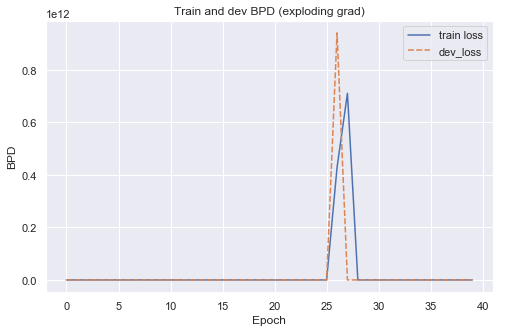

In [9]:

title = "Train and dev BPD (exploding grad)"
ylabel = "BPD"
xlabel = "Epoch"

sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lineplot(data = df_bpd)

ax.set_title(title)
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)

fig = ax.get_figure()
title = title.split()
title = "_".join(title)
fig.savefig(title + ".png")

In [7]:
df_bpd < 1.85

,train loss,dev_loss
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
